In [1]:
import joblib
from pathlib import Path
import numpy as np 
from matplotlib import pyplot as plt 
import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=False)
label_ptrange = [500, 600, 800, 1000, 1200, 1500, 2000]

In [8]:
pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/note_plots'
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'

systlist =['powhegpythia']#['herwigangle','herwigdipole'] #['sherpa','sherpalund']#['powhegpythia']#['sherpa','sherpalund'] #
herwig_SFs={}
reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
dicc = {}

for i_var in reweighting_vars:
    dicc[i_var]={}

    nominal_SFs = joblib.load(nominal_path / f'{i_var}_Extraction_Results.pkl' ) 

    fraction_pt_slices = []
    for pt in label_ptrange[:-1]:
        fraction_pt_slices.append(nominal_SFs[f'{i_var}'][pt]['f'])
    dicc[i_var]['pythia'] = fraction_pt_slices  

    for her in systlist: 
        herwig = pkl_path / 'matrix_element' / her / 'plots' / 'ADE' / 'Extraction_Results' 
        herwig_SFs[her] = joblib.load(herwig/ f'{i_var}_Extraction_Results.pkl' )

        fraction_pt_slices_her=[]
        for pt in label_ptrange[:-1]:
            fraction_pt_slices_her.append(herwig_SFs[her][f'{i_var}'][pt]['f']) 
        dicc[i_var][her] =fraction_pt_slices_her 


jet_nTracks_pythia Higher Quark:  [0.56874179 0.61636495 0.65994046 0.69548726 0.73005862 0.77696566]
jet_nTracks_powhegpythia Higher Quark:  [0.58224349 0.63754191 0.68101041 0.71113349 0.73987874 0.77678535]
GBDT_newScore_pythia Higher Quark:  [0.56871799 0.61624311 0.65938106 0.6940213  0.72720691 0.76921063]
GBDT_newScore_powhegpythia Higher Quark:  [0.58221883 0.6374186  0.68044816 0.70971235 0.73707378 0.76858689]


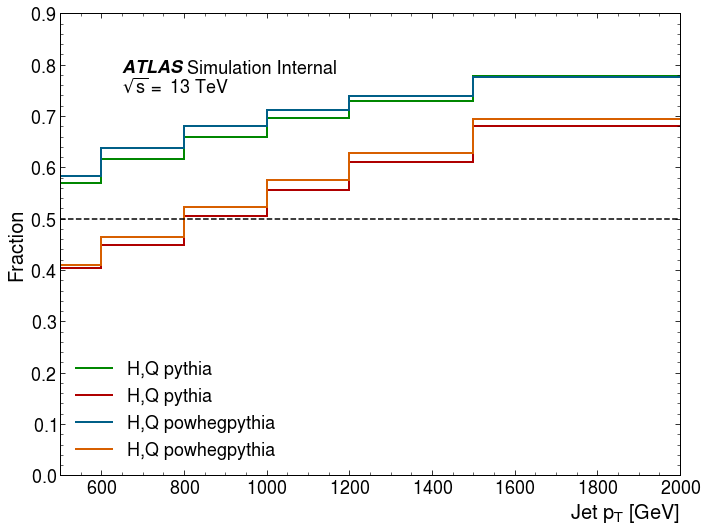

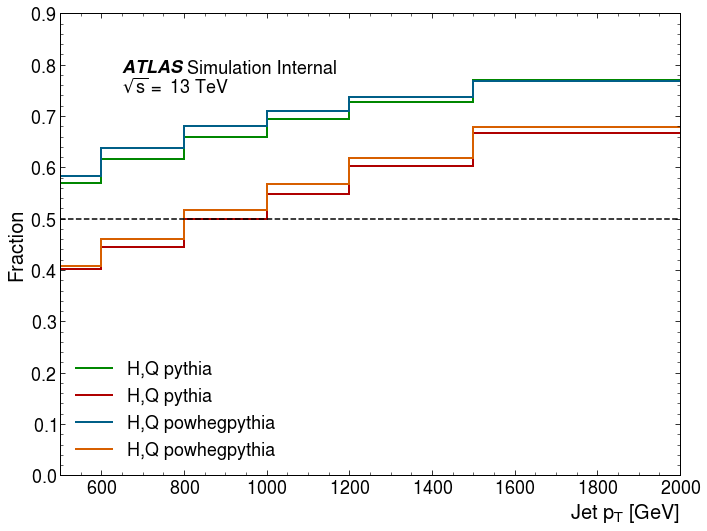

In [11]:
bin_edges = label_ptrange
import random
inxx = 0

for rew,v1 in dicc.items():
        fig, ax = plt.subplots()
        for syst,v2 in v1.items():

                fraction_pt_slices_her = np.array(v2)
                fractions_her = fraction_pt_slices_her.reshape((6, 4)).swapaxes(0,1)
                frac_Forward_Quark_her = fractions_her[0, :]
                frac_Central_Quark_her = fractions_her[2, :]


                ax.stairs(frac_Forward_Quark_her, bin_edges, label=f"H,Q {syst}", color=f'C{inxx}', baseline=None, linewidth = 2)
                inxx += 1
                ax.stairs(frac_Central_Quark_her, bin_edges, label=f"H,Q {syst}", color=f'C{inxx}', baseline=None, linewidth = 2)
                inxx += 1
                #ax.stairs(frac_Forward_Quark, bin_edges, label=rf"$f_{Forward, Quark}$_{i_var}", color="purple", baseline=None, linewidth = 2)
                #ax.stairs(frac_Central_Quark, bin_edges, label=rf"$f_{Central, Quark}$_{i_var}", color="blue", baseline=None, linewidth = 2)
                ax.legend()
                print(f"{rew}_{syst} Higher Quark: ",frac_Forward_Quark_her)


        ax.hlines(y=0.5, xmin=bin_edges[0], xmax=bin_edges[-1], linestyles='dashed', color="black")
        ax.set_xlim(bin_edges[0], bin_edges[-1])
        ax.set_xlabel('Jet $p_{\mathrm{T}}$ [GeV]',loc='right')
        ax.set_ylabel('Fraction') 
        ampl.draw_atlas_label(0.1, 0.9, ax=ax, energy="13 TeV", simulation=True)

        fig_name = f'/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/frac/Fraction_{rew}_{syst}.pdf'
        fig.savefig(fig_name)